## **INSTALLING CATBOOST**

In [2]:
!pip install catboost

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## **IMPORTING REQUIRED LIBRARIES**

In [3]:
#Importing Scientific Computing Libraries
import numpy as np

#Importing Data Manipulation Library
import pandas as pd

#Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Classifier Libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

#Importing Model Evaluation Library
from sklearn import metrics

In [4]:
#Importing Warning to filter future warnings
import warnings
warnings.simplefilter("ignore")
sns.set_theme()

## **EXTRACTING DATASET**

In [5]:
train = pd.read_csv("../input/merchandise-popularity-prediction-challenge/Train.csv") #Train dataSET
test  = pd.read_csv("../input/merchandise-popularity-prediction-challenge/Test.csv") #Test dataSET

In [6]:
train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [7]:
#Function to Analyze dataset
def evaluate(data):
  print('Dimension of dataset:{}'.format(data.shape),'\n',67*'-')
  print('Number of duplicated values:{}'.format(data.duplicated().sum()),'\n',67*'-')
  print('rows contain null values:\n{}'.format(data.isnull().sum()),'\n',67*'-')
  print('Schema of the dataset:\n',data.info(),'\n',67*'-')
  print('Descriptive Analysis:\n{}'.format(data.describe()),'\n',67*'-')
  print('Correlation:\n{}'.format(data.corr()),'\n',67*'-')

In [8]:
#Training dataset
evaluate(train)

Dimension of dataset:(18208, 12) 
 -------------------------------------------------------------------
Number of duplicated values:2923 
 -------------------------------------------------------------------
rows contain null values:
Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64 
 -------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  

In [9]:
#removing duplicate values
train.drop_duplicates(inplace = True)

In [10]:
train.head(3)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.0038,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.1050,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.7260,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4


In [11]:
train['add'] = train['Store_Ratio']/train["Basket_Ratio"]

In [12]:
train.head(3)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity,add
0,0.407,0.0038,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4,107.105263
1,0.234,0.1050,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4,2.228571
2,0.668,0.7260,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4,0.920110


In [13]:
#Training dataset columns
train.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity', 'add'],
      dtype='object')

In [14]:
X = train[['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'add']]
y = train['popularity']

In [15]:
#Splitting dataset into train and test sets 
x_train, x_valid, y_train, y_valid = train_test_split(X,y, random_state = 0, test_size = 0.2)

##**DECISION TREE CLASSIFIER**

In [16]:
DTC = DecisionTreeClassifier(max_depth=13, min_samples_leaf=5).fit(x_train, y_train)
predict = DTC.predict(x_valid)
cm = metrics.confusion_matrix(y_valid, predict) 
matrix = metrics.classification_report(y_valid, predict)

print(cm , '\n')
print(matrix)

[[   1    0    0    0    0]
 [   0    1    8   41    1]
 [   0    3   71  286    6]
 [   0   13  156 2403    5]
 [   0    0   13   48    1]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.06      0.02      0.03        51
           3       0.29      0.19      0.23       366
           4       0.87      0.93      0.90      2577
           5       0.08      0.02      0.03        62

    accuracy                           0.81      3057
   macro avg       0.46      0.43      0.44      3057
weighted avg       0.77      0.81      0.79      3057



##**KNN CLASSIFIER**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [18]:
knn = KNeighborsClassifier().fit(x_train, y_train)
predict1 = knn.predict(x_valid)
cm1 = metrics.confusion_matrix(y_valid, predict1) 
matrix1 = metrics.classification_report(y_valid, predict1);

print(cm1, '\n')
print(matrix1)

[[   0    0    0    1    0]
 [   0    0    2   49    0]
 [   0    1   13  352    0]
 [   0    2   66 2507    2]
 [   0    0    1   61    0]] 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        51
           3       0.16      0.04      0.06       366
           4       0.84      0.97      0.90      2577
           5       0.00      0.00      0.00        62

    accuracy                           0.82      3057
   macro avg       0.20      0.20      0.19      3057
weighted avg       0.73      0.82      0.77      3057



## **NAIVE BAYES CLASSIFIER**

In [19]:
from sklearn.naive_bayes import GaussianNB
GaussianNB()

GaussianNB()

In [20]:
GNB = GaussianNB().fit(x_train, y_train)
Predict2 =GNB.predict(x_valid)

cm2 = metrics.confusion_matrix(y_valid, Predict2) 
matrix2 = metrics.classification_report(y_valid, Predict2);
print(cm2, "\n")
print(matrix2)

[[   1    0    0    0    0]
 [   0    0    3   48    0]
 [   0    0   42  322    2]
 [   0    0   58 2507   12]
 [   0    0    8   54    0]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        51
           3       0.38      0.11      0.18       366
           4       0.86      0.97      0.91      2577
           5       0.00      0.00      0.00        62

    accuracy                           0.83      3057
   macro avg       0.45      0.42      0.42      3057
weighted avg       0.77      0.83      0.79      3057



## **RANDOM FOREST CLASSIFIER**

In [21]:
RFC = RandomForestClassifier(n_estimators = 100, max_depth = 20).fit(x_train, y_train)
Predict3 = RFC.predict(x_valid)
cm3 = metrics.confusion_matrix(y_valid, Predict3) 
matrix3 = metrics.classification_report(y_valid, Predict3);
print(cm3, "\n")
print(matrix3)

[[   1    0    0    0    0]
 [   0    1    3   47    0]
 [   0    1   28  337    0]
 [   0    0   25 2552    0]
 [   0    0    8   54    0]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.02      0.04        51
           3       0.44      0.08      0.13       366
           4       0.85      0.99      0.92      2577
           5       0.00      0.00      0.00        62

    accuracy                           0.84      3057
   macro avg       0.56      0.42      0.42      3057
weighted avg       0.78      0.84      0.79      3057



## **XGBOOST CLASSIFIER**

In [22]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [23]:
xgb = XGBClassifier(max_depth=13).fit(x_train, y_train)
predict4 = xgb.predict(x_valid)
cm4 = metrics.confusion_matrix(y_valid, predict4) 
matrix4 = metrics.classification_report(y_valid, predict4);
print(cm4, "\n")
print(matrix4)

[08:54:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[   1    0    0    0    0]
 [   0    1   10   40    0]
 [   0    1   43  321    1]
 [   0    3   52 2520    2]
 [   0    0   13   48    1]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.20      0.02      0.04        51
           3       0.36      0.12      0.18       366
           4       0.86      0.98      0.92      2577
           5       0.25      0.02      0.03        62

    accuracy                           0.84      3057
   macro avg       0.53      0.43      0.43      3057
weighted avg       0.78      0.84      0.79      3057



## **GRADIENT BOOSTING CLASSIFIER**

In [24]:
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predict5 = gbc.predict(x_valid)
cm5 = metrics.confusion_matrix(y_valid, predict5) 
matrix5 = metrics.classification_report(y_valid, predict5);
print(cm5, "\n")
print(matrix5)

[[   1    0    0    0    0]
 [   0    0    5   46    0]
 [   0    1   18  346    1]
 [   0    1   21 2552    3]
 [   0    1    5   56    0]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        51
           3       0.37      0.05      0.09       366
           4       0.85      0.99      0.92      2577
           5       0.00      0.00      0.00        62

    accuracy                           0.84      3057
   macro avg       0.44      0.41      0.40      3057
weighted avg       0.76      0.84      0.78      3057



## **EXTRA TREES CLASSIFIER**

In [25]:
ExtraTreesClassifier()

ExtraTreesClassifier()

In [26]:
etc = ExtraTreesClassifier(n_estimators = 150).fit(x_train, y_train)
predict6 = etc.predict(x_valid)
cm6 = metrics.confusion_matrix(y_valid, predict6) 
matrix6 = metrics.classification_report(y_valid, predict6);
print(cm6, "\n")
print(matrix6)

[[   1    0    0    0    0]
 [   0    2    5   44    0]
 [   0    1   15  349    1]
 [   0    1   23 2553    0]
 [   0    0    7   55    0]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.04      0.07        51
           3       0.30      0.04      0.07       366
           4       0.85      0.99      0.92      2577
           5       0.00      0.00      0.00        62

    accuracy                           0.84      3057
   macro avg       0.53      0.41      0.41      3057
weighted avg       0.76      0.84      0.78      3057



## **ADA BOOST CLASSIFIER**

In [27]:
AdaBoostClassifier()

AdaBoostClassifier()

In [28]:
abc = AdaBoostClassifier().fit(x_train, y_train)
predict7 = abc.predict(x_valid)
cm7 = metrics.confusion_matrix(y_valid, predict7) 
matrix7 = metrics.classification_report(y_valid, predict7);
print(cm7, "\n")
print(matrix7)

[[   1    0    0    0    0]
 [   0    2    0   32   17]
 [   0    1    0  186  179]
 [   0    0    0 1332 1245]
 [   0    0    0   34   28]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      0.04      0.07        51
           3       0.00      0.00      0.00       366
           4       0.84      0.52      0.64      2577
           5       0.02      0.45      0.04        62

    accuracy                           0.45      3057
   macro avg       0.51      0.40      0.35      3057
weighted avg       0.72      0.45      0.54      3057



## **CATBOOST CLASSIFIER**

In [29]:
cbc = CatBoostClassifier(task_type = "GPU", eval_metric = 'Accuracy', iterations = 500, random_state=0).fit(x_train, y_train)
predict8 = cbc.predict(x_valid)
cm8 = metrics.confusion_matrix(y_valid, predict8) 
matrix8 = metrics.classification_report(y_valid, predict8);
print(cm8, "\n")
print(matrix8)

Learning rate set to 0.192691
0:	learn: 0.8408570	total: 22.4ms	remaining: 11.2s
1:	learn: 0.8404482	total: 32ms	remaining: 7.96s
2:	learn: 0.8401210	total: 41.1ms	remaining: 6.81s
3:	learn: 0.8401210	total: 50.5ms	remaining: 6.26s
4:	learn: 0.8400393	total: 59.7ms	remaining: 5.91s
5:	learn: 0.8400393	total: 68.8ms	remaining: 5.66s
6:	learn: 0.8401210	total: 78.1ms	remaining: 5.5s
7:	learn: 0.8401210	total: 87.2ms	remaining: 5.37s
8:	learn: 0.8403664	total: 96.6ms	remaining: 5.27s
9:	learn: 0.8402846	total: 106ms	remaining: 5.18s
10:	learn: 0.8406935	total: 115ms	remaining: 5.11s
11:	learn: 0.8407753	total: 124ms	remaining: 5.04s
12:	learn: 0.8411024	total: 133ms	remaining: 4.98s
13:	learn: 0.8418384	total: 142ms	remaining: 4.93s
14:	learn: 0.8424926	total: 151ms	remaining: 4.88s
15:	learn: 0.8426562	total: 160ms	remaining: 4.83s
16:	learn: 0.8430651	total: 169ms	remaining: 4.8s
17:	learn: 0.8431469	total: 178ms	remaining: 4.76s
18:	learn: 0.8439647	total: 187ms	remaining: 4.72s
19:	le

170:	learn: 0.8867354	total: 1.66s	remaining: 3.19s
171:	learn: 0.8869807	total: 1.67s	remaining: 3.18s
172:	learn: 0.8869807	total: 1.68s	remaining: 3.17s
173:	learn: 0.8871443	total: 1.69s	remaining: 3.17s
174:	learn: 0.8875532	total: 1.72s	remaining: 3.19s
175:	learn: 0.8872260	total: 1.73s	remaining: 3.18s
176:	learn: 0.8877985	total: 1.75s	remaining: 3.19s
177:	learn: 0.8877167	total: 1.78s	remaining: 3.21s
178:	learn: 0.8882074	total: 1.84s	remaining: 3.31s
179:	learn: 0.8885345	total: 1.87s	remaining: 3.33s
180:	learn: 0.8887798	total: 1.88s	remaining: 3.31s
181:	learn: 0.8888616	total: 1.89s	remaining: 3.3s
182:	learn: 0.8898430	total: 1.9s	remaining: 3.29s
183:	learn: 0.8898430	total: 1.91s	remaining: 3.28s
184:	learn: 0.8900883	total: 1.92s	remaining: 3.27s
185:	learn: 0.8900065	total: 1.93s	remaining: 3.26s
186:	learn: 0.8900065	total: 1.94s	remaining: 3.25s
187:	learn: 0.8902519	total: 1.95s	remaining: 3.23s
188:	learn: 0.8900883	total: 1.96s	remaining: 3.23s
189:	learn: 0.

336:	learn: 0.9163395	total: 3.5s	remaining: 1.69s
337:	learn: 0.9166667	total: 3.5s	remaining: 1.68s
338:	learn: 0.9165849	total: 3.51s	remaining: 1.67s
339:	learn: 0.9174845	total: 3.52s	remaining: 1.66s
340:	learn: 0.9174845	total: 3.53s	remaining: 1.65s
341:	learn: 0.9175662	total: 3.54s	remaining: 1.64s
342:	learn: 0.9176480	total: 3.55s	remaining: 1.62s
343:	learn: 0.9179751	total: 3.56s	remaining: 1.61s
344:	learn: 0.9179751	total: 3.57s	remaining: 1.6s
345:	learn: 0.9178934	total: 3.58s	remaining: 1.59s
346:	learn: 0.9178934	total: 3.58s	remaining: 1.58s
347:	learn: 0.9182205	total: 3.59s	remaining: 1.57s
348:	learn: 0.9182205	total: 3.6s	remaining: 1.56s
349:	learn: 0.9181387	total: 3.61s	remaining: 1.55s
350:	learn: 0.9183023	total: 3.62s	remaining: 1.54s
351:	learn: 0.9184658	total: 3.63s	remaining: 1.53s
352:	learn: 0.9187112	total: 3.64s	remaining: 1.51s
353:	learn: 0.9188747	total: 3.65s	remaining: 1.5s
354:	learn: 0.9190383	total: 3.66s	remaining: 1.49s
355:	learn: 0.919

[[   1    0    0    0    0]
 [   0    2    9   40    0]
 [   0    1   51  312    2]
 [   0    1   55 2515    6]
 [   0    0   13   48    1]] 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.04      0.07        51
           3       0.40      0.14      0.21       366
           4       0.86      0.98      0.92      2577
           5       0.11      0.02      0.03        62

    accuracy                           0.84      3057
   macro avg       0.57      0.43      0.44      3057
weighted avg       0.79      0.84      0.80      3057



## **ACCURACY SCORES OF CLASSIFIERS**

In [30]:
print(metrics.accuracy_score(y_valid, predict))
print(metrics.accuracy_score(y_valid, predict1))
print(metrics.accuracy_score(y_valid, Predict2))
print(metrics.accuracy_score(y_valid, Predict3))
print(metrics.accuracy_score(y_valid, predict4))
print(metrics.accuracy_score(y_valid, predict5))
print(metrics.accuracy_score(y_valid, predict6))
print(metrics.accuracy_score(y_valid, predict7))
print(metrics.accuracy_score(y_valid, predict8))

0.8102715080143932
0.8243375858684985
0.8341511285574092
0.8446189074255807
0.8393850179914949
0.8410206084396468
0.8410206084396468
0.44586195616617597
0.8406934903500164


## **TEST DATASET**

In [31]:
test['add'] = test['Store_Ratio']/test["Basket_Ratio"]

In [32]:
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,add
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436,0.164990
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631,0.921384
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669,0.615074
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200,0.565508
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293,1.060847


In [33]:
#Evaluating Test Dataset
evaluate(test)

Dimension of dataset:(12140, 12) 
 -------------------------------------------------------------------
Number of duplicated values:1444 
 -------------------------------------------------------------------
rows contain null values:
Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
add               1
dtype: int64 
 -------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  

In [34]:
#Filling Null Values
test['add'].fillna(test['add'].mean(), inplace=True)

In [35]:
test = test[['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'add']]

In [36]:
ans1 =  DTC.predict(test)
ans2 = RFC.predict(test)
ans3 = xgb.predict(test)
ans4 = gbc.predict(test)
ans5 = etc.predict(test)
ans6 = abc.predict(test)
ans7 = cbc.predict(test)

## **VISUALIZING OUTPUT**

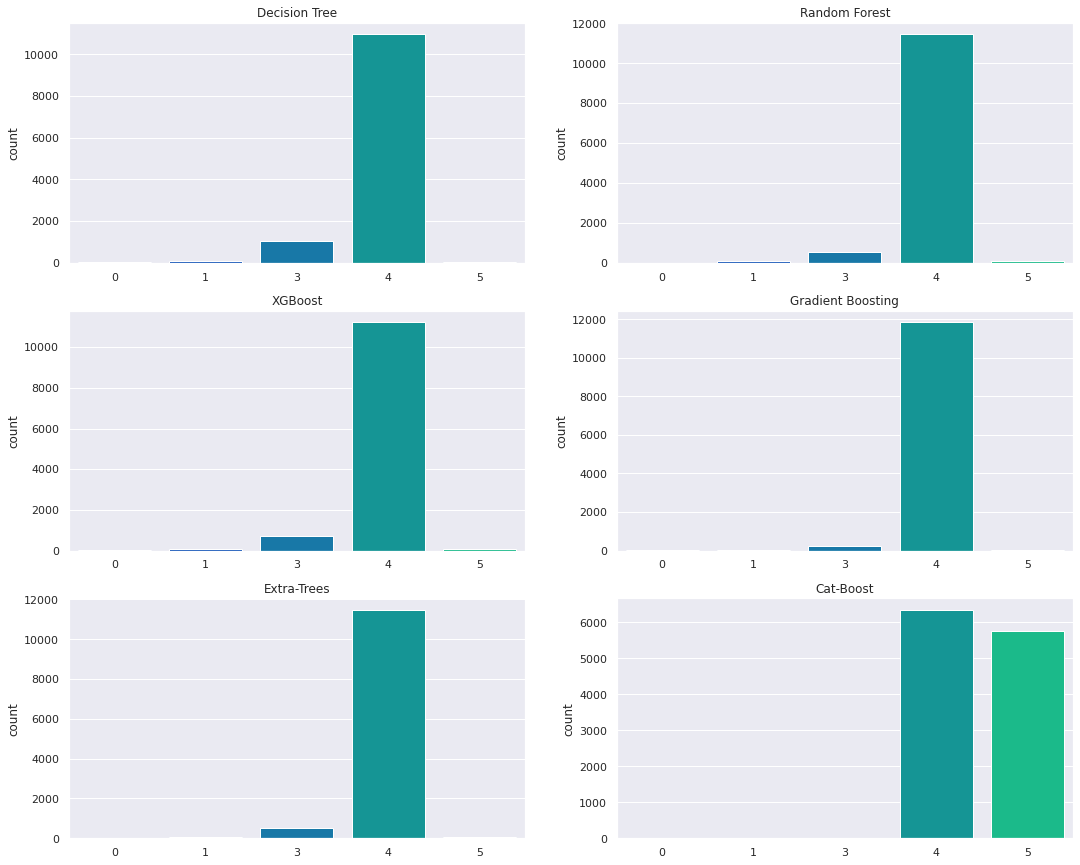

In [37]:
plt.figure(figsize = (18,15))
plt.subplot(3,2,1)
sns.countplot(ans1, palette = "winter")
plt.title("Decision Tree")

plt.subplot(3,2,2)
sns.countplot(ans2, palette = "winter")
plt.title("Random Forest")

plt.subplot(3,2,3)
sns.countplot(ans3, palette = "winter")
plt.title("XGBoost");

plt.subplot(3,2,4)
sns.countplot(ans4, palette = "winter")
plt.title("Gradient Boosting");

plt.subplot(3,2,5)
sns.countplot(ans5, palette = "winter")
plt.title("Extra-Trees");

plt.subplot(3,2,6)
sns.countplot(ans6, palette = "winter")
plt.title("Cat-Boost");